In [2]:
# load score as df
path_knn = 'result/knn_result.csv'
path_lasso = 'result/lasso_result.csv'

import pandas as pd
df_knn = pd.read_csv(path_knn)
df_lasso = pd.read_csv(path_lasso)

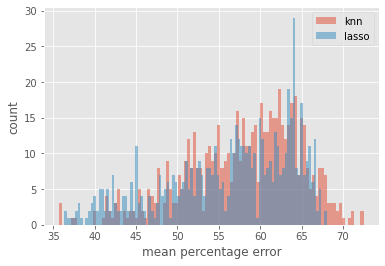

In [5]:
# plot the df_knn and df_lasso as histograms

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.hist(df_knn['mean'], bins=100, alpha=0.5, label='knn')
plt.hist(df_lasso['mean'], bins=100, alpha=0.5, label='lasso')
plt.xlabel('mean percentage error')
plt.ylabel('count')
plt.legend(loc='upper right')

plt.show()
